In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [2]:
# Import the CSV file
data = pd.read_csv('Telco-Customer-Churn (TRAIN, TEST).csv')

## EXPLORE DATA ANALYSIS

In [3]:
data.dtypes

Row                   int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
del data["Row"]

In [5]:
#Change from an object to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [6]:
#Checking for null values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        6
Churn               0
dtype: int64

In [7]:
#Impute Missing Values
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

C:\Users\Xolani.Mthembu\AppData\Local\Temp\ipykernel_14688\1598959325.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


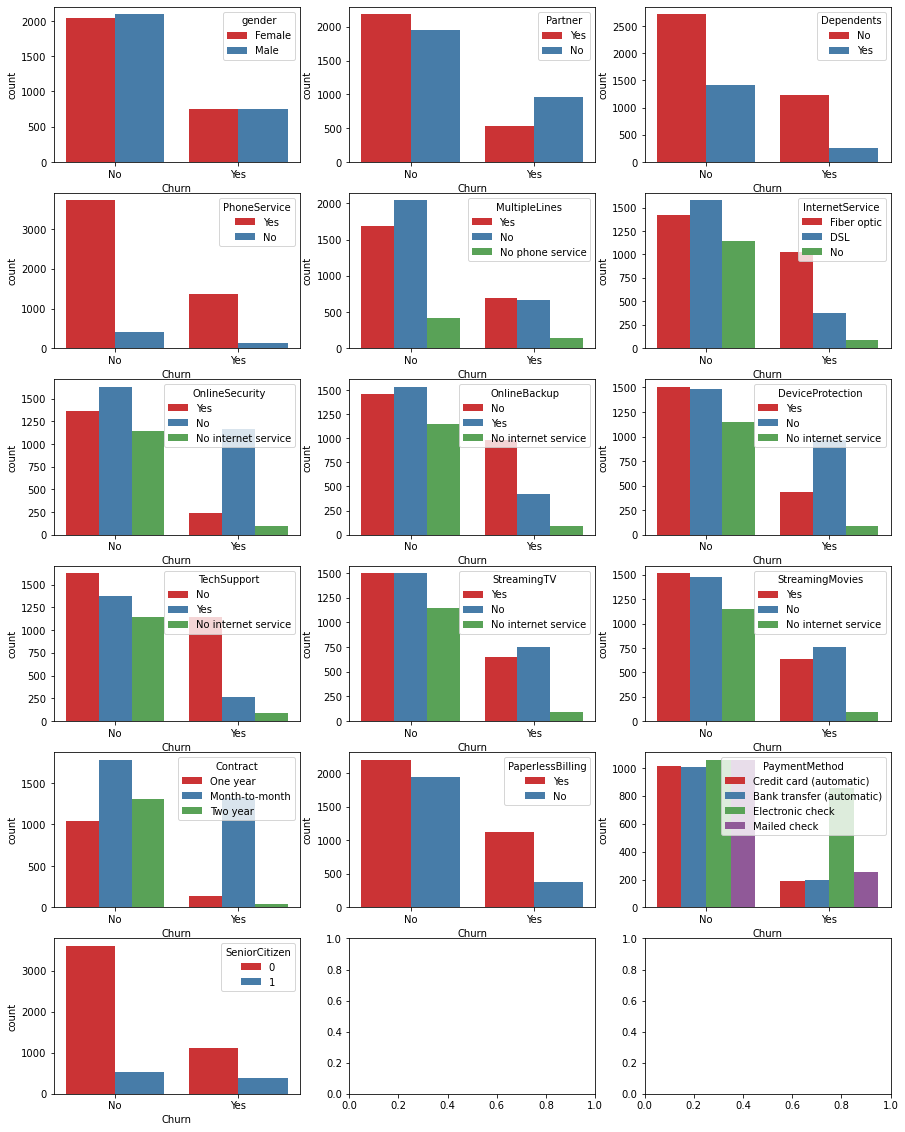

In [8]:
#Plotting The relationship between features and Churn
fig, ax =pyplot.subplots(6,3,figsize=(15,20))


sb.countplot(x = data["Churn"], hue = data["gender"], palette = "Set1", ax=ax[0][0])
sb.countplot(x = data["Churn"], hue = data["Partner"], palette = "Set1", ax=ax[0][1])
sb.countplot(x = data["Churn"], hue = data["Dependents"], palette = "Set1", ax=ax[0][2])

sb.countplot(x = data["Churn"], hue = data["PhoneService"], palette = "Set1", ax=ax[1][0])
sb.countplot(x = data["Churn"], hue = data['MultipleLines'], palette = "Set1", ax=ax[1][1])
sb.countplot(x = data["Churn"], hue = data['InternetService'], palette = "Set1", ax=ax[1][2])

sb.countplot(x = data["Churn"], hue = data['OnlineSecurity'], palette = "Set1", ax=ax[2][0])
sb.countplot(x = data["Churn"], hue = data['OnlineBackup'], palette = "Set1", ax=ax[2][1])
sb.countplot(x = data["Churn"], hue = data['DeviceProtection'], palette = "Set1", ax=ax[2][2])

sb.countplot(x = data["Churn"], hue = data['TechSupport'], palette = "Set1", ax=ax[3][0])
sb.countplot(x = data["Churn"], hue = data['StreamingTV'], palette = "Set1", ax=ax[3][1])
sb.countplot(x = data["Churn"], hue = data['StreamingMovies'], palette = "Set1", ax=ax[3][2])

sb.countplot(x = data["Churn"], hue = data['Contract'], palette = "Set1", ax=ax[4][0])
sb.countplot(x = data["Churn"], hue = data['PaperlessBilling'], palette = "Set1", ax=ax[4][1])
sb.countplot(x = data["Churn"], hue = data['PaymentMethod'], palette = "Set1", ax=ax[4][2])

sb.countplot(x = data["Churn"], hue = data['SeniorCitizen'], palette = "Set1", ax=ax[5][0])
fig.show()


[Text(0.5, 1.0, 'COUNTPLOT OF CHURN')]

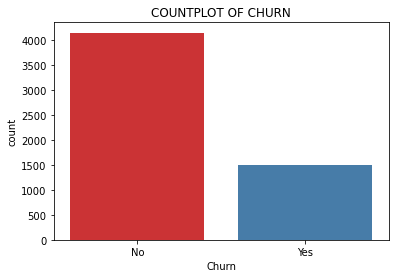

In [9]:
#Churn visualization

sb.countplot(x = "Churn", data = data, palette = "Set1").set(title = "COUNTPLOT OF CHURN")

# CATEGORICAL FEATURES IMPORTANCY TESTING USING CHI-SQUARE

In [10]:
categorical = list(data.dtypes.loc[data.dtypes == 'object'].index)

In [11]:
categorical.remove('customerID')

In [12]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

df = data
#Initialize ChiSquare Class
cT = ChiSquare(df)

#Feature Selection
for var in categorical:
    cT.TestIndependence(colX=var,colY="Churn" ) 


gender is NOT an important predictor. (Discard gender from model)
Partner is IMPORTANT for Prediction
Dependents is IMPORTANT for Prediction
PhoneService is NOT an important predictor. (Discard PhoneService from model)
MultipleLines is IMPORTANT for Prediction
InternetService is IMPORTANT for Prediction
OnlineSecurity is IMPORTANT for Prediction
OnlineBackup is IMPORTANT for Prediction
DeviceProtection is IMPORTANT for Prediction
TechSupport is IMPORTANT for Prediction
StreamingTV is IMPORTANT for Prediction
StreamingMovies is IMPORTANT for Prediction
Contract is IMPORTANT for Prediction
PaperlessBilling is IMPORTANT for Prediction
PaymentMethod is IMPORTANT for Prediction
Churn is IMPORTANT for Prediction


# ENCODE CATEGORICAL VARIABLES

In [13]:
#convert all the string columns to categorical form
for var in categorical:
    data[var] = data[var].astype('category')

In [14]:
data[categorical] = data[categorical].apply(lambda x: x.cat.codes)

# SELECTING IMPORTANT FEATURES THAT CONTRIBUTE TO CHURN

In [15]:
target = data['Churn']
data=data.drop('customerID',axis=1)
all_columns = list(data.columns)
all_columns.remove('Churn')

In [16]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = data[all_columns] # Features
y = data['Churn'] # Target variable

# Feature extraction
model = LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(X, y)

In [17]:
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 9
Selected Features: [False  True False  True False  True  True False  True  True False  True
 False False  True  True False False False]
Feature Ranking: [ 2  1 10  1  3  1  1  6  1  1  4  1  8  9  1  1  5  7 11]


In [18]:
selected_features_rfe = list(fit.support_)

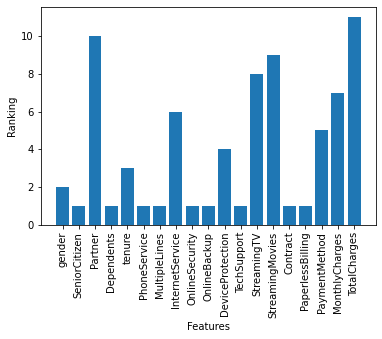

In [19]:
pyplot.bar(range(len(rfe.ranking_)), rfe.ranking_)
pyplot.xticks(range(len(X.columns)), X.columns, rotation='vertical')
pyplot.xlabel('Features')
pyplot.ylabel('Ranking')
pyplot.show()

In [20]:
#SELECTED FEATURES THAT CONTRIBUTE TO CHURN
final_features_rfe = []    
for status, var in zip(selected_features_rfe, all_columns):
    if status == True:
        final_features_rfe.append(var)
        
final_features_rfe

['SeniorCitizen',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'Contract',
 'PaperlessBilling']

In [21]:
from sklearn import metrics

In [22]:
X_rfe_lr = data[final_features_rfe]
y = data['Churn']



X_train_rfe_lr,X_test_rfe_lr,y_train_rfe_lr,y_test_rfe_lr=train_test_split(X_rfe_lr,y,test_size=0.25,random_state=0)
X_train_rfe, X_val_rfe, y_train_rfe, y_val_rfe = train_test_split(X_rfe_lr, y, test_size=0.25, random_state=0)

lr_model = LogisticRegression()

# fit the model with data
lr_model.fit(X_train_rfe_lr,y_train_rfe_lr)
y_pred_rfe_lr=lr_model.predict(X_test_rfe_lr)

acc_rfe_lr = metrics.accuracy_score(y_test_rfe_lr, y_pred_rfe_lr)
print("Accuracy: ",acc_rfe_lr)

Accuracy:  0.772888573456352


In [23]:
importance = lr_model.coef_.flatten()

In [24]:
print(importance)

[ 0.22068477 -0.27302692  0.23048072  0.16134005 -0.36889511 -0.22138971
 -0.2368989  -1.31965841  0.55647152]


# LOGISTIC MODEL TRAINING, TESTING AND PREDICTION

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
# instantiate the model (using the default parameters)
lr_model_single = LogisticRegression()

# fit the model with data
lr_model_single.fit(X_train,y_train)
y_pred=lr_model_single.predict(X_test)

lr_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ",lr_acc)

Accuracy:  0.7927608232789212


In [26]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[889, 116],
       [176, 228]], dtype=int64)

In [27]:
len(y_pred)

1409

In [28]:
#Input data for prediction
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4085,0,0,0,0,8,1,0,1,2,0,0,0,2,0,0,0,2,84.95,668.40
2689,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,1,3,20.20,20.20
2655,0,0,0,0,1,1,0,0,2,0,0,0,0,0,0,0,2,50.15,50.15
3888,0,0,1,1,54,1,0,2,1,1,1,1,1,1,2,1,0,20.35,1092.35
1507,1,0,0,0,51,0,1,0,2,0,0,2,0,2,0,1,1,44.45,2181.55


In [29]:
#Converting prediction array to dataframe
df1 = pd.DataFrame(y_pred)

In [30]:
df1.head()

,0
0,0
1,0
2,0
3,0
4,0


In [31]:
len(X_test)

1409

# EXPORT TESTING DATA AND PREDICTION TO EXCEL

In [32]:
writer = pd.ExcelWriter('Prediction.xlsx', engine='xlsxwriter')

X_test.to_excel(writer, sheet_name='Testing_Input')

df1.to_excel(writer, sheet_name='Prediction')


writer.save()